Type:  <class 'numpy.ndarray'>
Shape:  (1000, 2048, 3)
Max:  83
Min:  0
Mean:  2.61464892578125
Standard Deviation:  3.9292811658862234


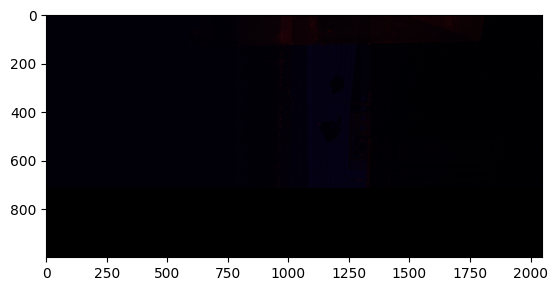

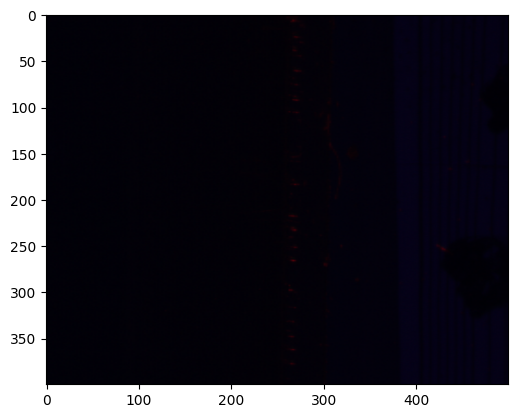

Image changed to Red channel


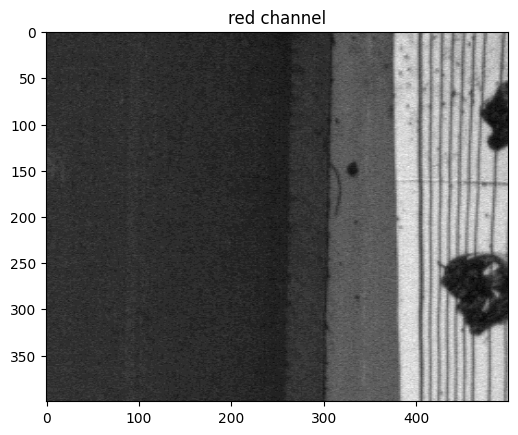

/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


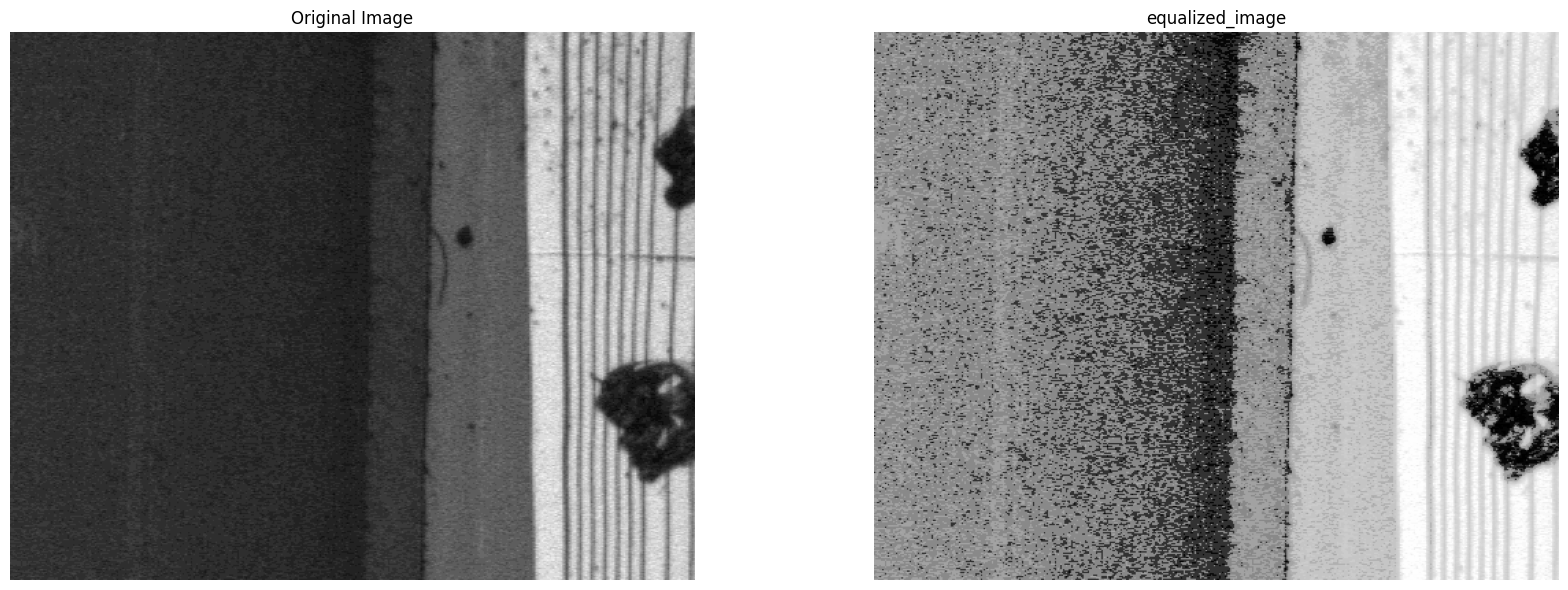

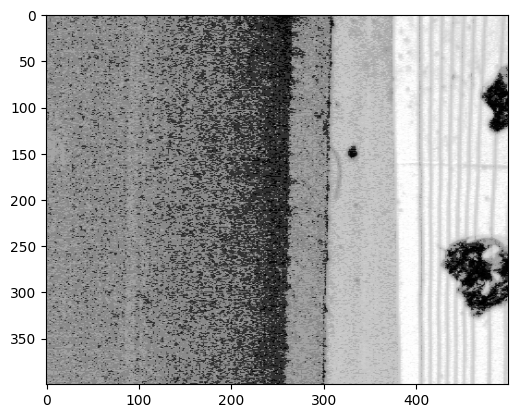

In [2]:
import numpy as np 
import cv2 
from pathlib import Path 
import matplotlib.pyplot as plt
import copy  # 用於深度複製物件
from datetime import datetime
 
class ImageManager: 
    def __init__(self, path) -> None: 
        self.path = Path(path)
        self.image = cv2.imread(self.path.as_posix())  # 讀取圖像 
        if self.image is None: 
            raise ValueError(f"Cannot load image at {self.path}")  # 若圖像無法讀取，則拋出錯誤 
        
        self.cmap_decide()
    
    def cmap_decide(self):
        """決定cmap"""
        if len(self.image.shape) == 2:
            self.cmap = 'gray'  # 灰度圖像使用灰度 cmap
        else:
            self.cmap = None  # 彩色圖像不使用 cmap
    
    def choose_rgb(self, channel: str):   
        """選擇通道rgb"""  
        channel = channel.lower() 
        if channel == 'b':  # 選擇藍色通道 
            self.image = self.image[:, :, 0] 
            print("Image changed to Blue channel") 
        elif channel == "g":  # 選擇綠色通道 
            self.image = self.image[:, :, 1] 
            print("Image changed to Green channel") 
        elif channel == "r":  # 選擇紅色通道 
            self.image = self.image[:, :, 2] 
            print("Image changed to Red channel") 
        else: 
            print("Invalid channel. Please choose 'r', 'g', or 'b'.") 
            
        self.cmap_decide()
         
    def basic_array_info(self): 
        """基本資訊""" 
        print("Type: ", type(self.image)) 
        print("Shape: ", self.image.shape) 
        print("Max: ", self.image.max()) 
        print("Min: ", self.image.min()) 
        print("Mean: ", self.image.mean()) 
        print("Standard Deviation: ", np.std(self.image)) 
 
    def save(self, name=None, output_folder=None): 
        """儲存圖片"""
        # 如果未指定name，則使用原始文件名加上"_modified"
        current = datetime.now().strftime('%Y%m%d_%H%M%S')
        if name is None: 
            # 使用原始文件名加上時間戳
            name = f"{self.path.stem}_{current}{self.path.suffix}"
        else: 
            # 確保指定的名稱包含正確的文件後綴 
            if not name.endswith(self.path.suffix): 
                name = f"{name}_{current}{self.path.suffix}"
            else:
                name = f"{name}_{current}{self.path.suffix}"
 
        # 如果未指定output_folder，則使用與原始文件相同的文件夾 
        if output_folder is None: 
            output_folder = self.path.parent 
 
        # 構建最終的輸出路徑 
        output_path = Path(output_folder) / name 
 
        # 保存圖像到指定的路徑 
        success = cv2.imwrite(output_path.as_posix(), self.image) 
        if success: 
            print(f"Image saved to {output_path}") 
        else: 
            print(f"Failed to save image to {output_path}") 
     
    def show(self, figsize=None, title=None, axis=True): 
        """儲存圖片"""
        # 檢查是否提供了 figsize 並相應地設置
        if figsize:
            plt.figure(figsize=figsize)
            
        # 根據圖像的維度來判斷顯示模式 
        plt.imshow(self.image, cmap=self.cmap)
        
        # 檢查是否提供了標題並相應地設置
        if title:
            plt.title(title)
        
        plt.axis('on' if axis else 'off')  # 顯示或隱藏軸 
        plt.show()  # 顯示圖像
          
    def crop(self, x1, x2, y1, y2): 
        """裁剪圖像"""
        self.image = self.image[y1:y2, x1:x2] 
        self.show()  # 顯示裁剪後的圖像 
     
    def copy(self): 
        """返回當前 ImageManager 物件的深度副本，保留當前圖像和屬性"""
        return copy.deepcopy(self)
 
    def process(self,  function, params=None, compare=False, compare_config=None): 
        """輸入一方法，用其處理圖片
        
        example: params={'standard': 2, 'print_image': True, 'print_threshold': False}
        """
        # 產生圖像副本，應用處理函數
        new_im = self.copy()  # 複製當前的 ImageManager
        if params:
            new_im.image = function(new_im.image, **params) 
        else:
            new_im.image = function(new_im.image) 
        
        if compare:
            if compare_config is None:
                compare_config = {'original_title': 'Original Image', 'processed_title': function.__name__}
            self.compare(new_im, compare_config)
        
        return new_im 
    
    def compare(self, new_im, compare_config):
        """比較處理圖片前後"""

        plt.figure(figsize=(18, 6))
        
        # 顯示原始影像
        plt.subplot(1, 2, 1)
        plt.imshow(self.image, cmap=self.cmap)
        plt.title(compare_config.get('original_title', 'Original Image'))
        plt.axis('off')

        # 顯示處理後的影像
        plt.subplot(1, 2, 2)
        plt.imshow(new_im.image, cmap=new_im.cmap)
        plt.title(compare_config.get('processed_title', 'Processed Image'))
        plt.axis('off')
        
        plt.tight_layout()

        plt.show()
        

if __name__ == "__main__":
    # 使用範例 
    origin_im = ImageManager(r'/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO/1_1.tif') 
    origin_im.basic_array_info() 
    origin_im.show()  # 顯示圖像 
    origin_im.crop(700, 1200, 200, 600)  # 裁剪圖像 
    origin_im.choose_rgb('r')  # 選擇紅色通道 
    origin_im.show(title='red channel')  # 顯示紅色通道的圖像 
    
    try:
        import os
        print(os.getcwd())
        os.chdir('../')
        from mymodules import filters  # 如果在包內
    except ImportError:
        import filters  # 如果直接在當前路徑中
        
    
    # # 應用處理函數，使用二值化
    new_im = origin_im.process(function=filters.equalized_image, compare=True) 
    new_im.show()  # 顯示處理後的圖像


In [3]:
import os
os.getcwd()

'/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks/test_notebooks'

In [18]:
origin_im.image.shape, new_im.image.shape

((400, 500), (400, 500))

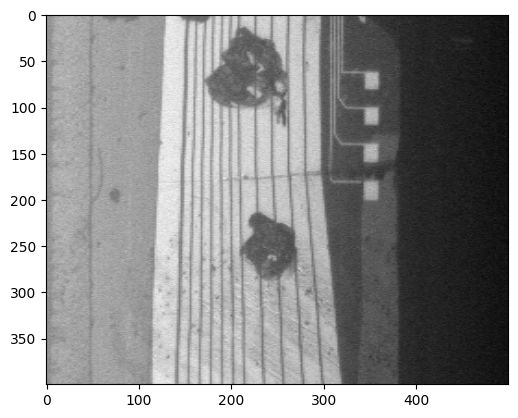

In [8]:
origin_im.choose_rgb('r')
origin_im.show()